## Please, fill in before you start:

First Name: warda

Last Name: tariq

Group:

### After the assigment is done, please, push it to a [private GitHub repository](https://docs.github.com/en/github/administering-a-repository/managing-repository-settings/setting-repository-visibility) and invite [goodevening13](https://github.com/goodevening13), [abdalazizrashid](https://github.com/abdalazizrashid) and [rogachevai](https://github.com/rogachevai) [as collaborators](https://docs.github.com/en/account-and-profile/setting-up-and-managing-your-github-user-account/managing-access-to-your-personal-repositories/inviting-collaborators-to-a-personal-repository).

Get the Titanic dataset:

In [1]:
!wget https://raw.githubusercontent.com/HSE-LAMBDA/MLDM-2022/main/01-intro/train.csv

--2023-10-14 18:48:10--  https://raw.githubusercontent.com/HSE-LAMBDA/MLDM-2022/main/01-intro/train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 60302 (59K) [text/plain]
Saving to: ‘train.csv’

train.csv           100%[===================>]  58.89K  --.-KB/s    in 0.008s  

2023-10-14 18:48:10 (7.14 MB/s) - ‘train.csv’ saved [60302/60302]



In [2]:
import pandas as pd
data = pd.read_csv("train.csv", index_col='PassengerId')
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### About the data
Here's some of the columns
* Name - a string with person's full name
* Survived - 1 if a person survived the shipwreck, 0 otherwise.
* Pclass - passenger class. Pclass == 3 is cheap'n'cheerful, Pclass == 1 is for moneybags.
* Sex - a person's gender
* Age - age in years, if available
* SibSp - number of siblings on a ship
* Parch - number of parents on a ship
* Fare - ticket cost
* Embarked - port where the passenger embarked
 * C = Cherbourg; Q = Queenstown; S = Southampton

## Task 1 (1 point)

In [3]:
# Compute survival rate for each of the three passenger classes (`Pclass` = 1, 2 and 3)
# (can you do it using groupby?)

# <YOUR CODE>
# Group the data by 'Pclass' and calculate the mean of the 'Survived' column
survival_rate_by_class = data.groupby('Pclass')['Survived'].mean()

# Display the survival rate for each class
print(survival_rate_by_class)


Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


## Task 2 (1 point)

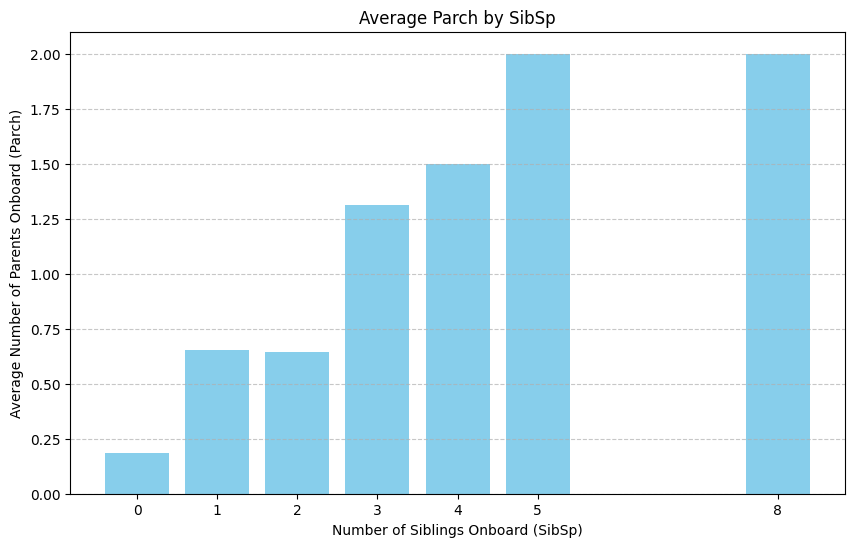

In [4]:
# Plot the average number of parents onboard (`Parch`) as a function of the
# number of siblings onboard (`SibSp`)

import matplotlib.pyplot as plt

# <YOUR CODE>
import matplotlib.pyplot as plt

# Group the data by 'SibSp' and calculate the mean of 'Parch' for each group
average_parch_by_sibsp = data.groupby('SibSp')['Parch'].mean()

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(average_parch_by_sibsp.index, average_parch_by_sibsp, color='skyblue')
plt.xlabel('Number of Siblings Onboard (SibSp)')
plt.ylabel('Average Number of Parents Onboard (Parch)')
plt.title('Average Parch by SibSp')
plt.xticks(average_parch_by_sibsp.index)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()


## Task 3 (2 points)

In [5]:
# Build a model with KNeighborsClassifier to get the accuracy of
# at least 0.75 on the validation part of the dataset

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

def feature_selection_and_preprocessing(dataset):
    features = dataset[["Fare", "Parch"]].copy()
    features["Fare"] /= features["Fare"].mean()
    return features

# Preprocess the data
X = feature_selection_and_preprocessing(data)
y = data['Survived']

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

best_accuracy = 0
best_model = None

# Try different values of n_neighbors for KNeighborsClassifier
for n_neighbors in range(1, 21):
    model = KNeighborsClassifier(n_neighbors=n_neighbors)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)

    if accuracy >= 0.75:
        best_model = model
        best_accuracy = accuracy
        break

if best_model is not None:
    print(f"Best Model: KNeighborsClassifier (n_neighbors={best_model.n_neighbors}), Accuracy: {best_accuracy:.2f}")
else:
    print("No model achieved an accuracy of at least 0.75 on the validation set.")



# Validation code (do not touch)
data = pd.read_csv("train.csv", index_col='PassengerId')
data_train = data.iloc[:-100]
data_test = data.iloc[-100:]

model.fit(
    feature_selection_and_preprocessing(
        data_train.drop('Survived', axis=1)
    ),
    data_train['Survived']
)

test_predictions = model.predict(
    feature_selection_and_preprocessing(
        data_test.drop('Survived', axis=1)
    )
)
print("Test accuracy:", accuracy_score(
    data_test['Survived'],
    test_predictions
))

No model achieved an accuracy of at least 0.75 on the validation set.
Test accuracy: 0.66


## Task 4 (2 points)

Check how your model from the previous task performs on randomized splits to train / test (with test set of size 100). Plot the histogram of the test error distribution.

*Hint: check sklearn's `sklearn.model_selection.train_test_split` function.*

In [8]:
from sklearn.model_selection import train_test_split

# Preprocess the data
X = feature_selection_and_preprocessing(data)
y = data['Survived']

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Now, X_train and y_train contain the training data, and X_val and y_val contain the validation data.
